Максимум функции в точке (5.1213, 5.1213) = 18120.9735
Минимум функции в точке (0.8787, 0.8787) = 2.7765


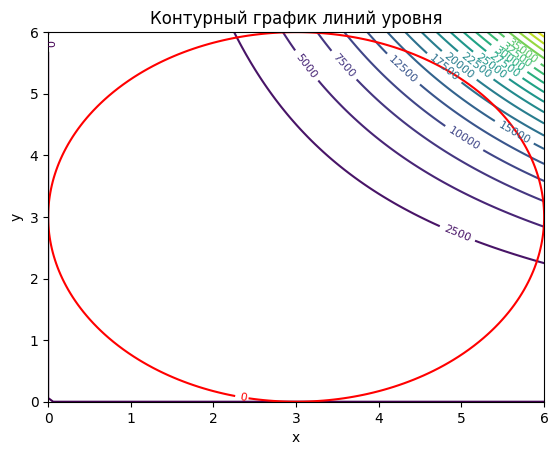

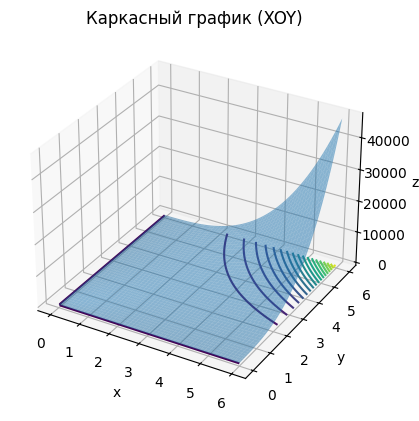

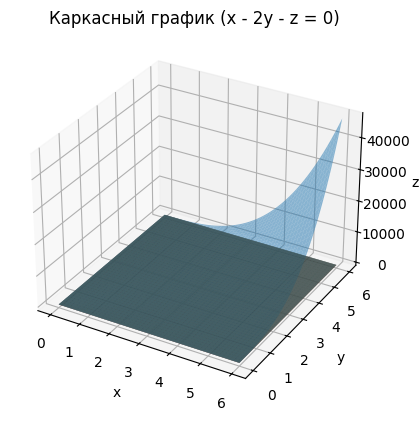

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.optimize import fsolve

# Определение функции
def f(x, y):
    return x**3 * y**3 + 3*x*y

# Определение ограничения
def g(x, y):
    return (x - 3)**2 + (y - 3)**2 - 9

# Создание сетки значений x и y
x = np.linspace(0, 6, 100)
y = np.linspace(0, 6, 100)
X, Y = np.meshgrid(x, y)

# Вычисление значений функции и ограничения
Z = f(X, Y)
C = g(X, Y)

# Построение контурного графика линий уровня функции и ограничения
fig, ax = plt.subplots()
contour_f = ax.contour(X, Y, Z, levels=20)
contour_g = ax.contour(X, Y, C, levels=[0], colors='red')
ax.clabel(contour_f, inline=True, fontsize=8)
ax.clabel(contour_g, inline=True, fontsize=8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Контурный график линий уровня')

# Приближенное определение координат точек экстремума
# по графику
x_max_approx = 4.2
y_max_approx = 4.2
x_min_approx = 1.8
y_min_approx = 1.8

# Определение функции Лагранжа
def L(args):
    x, y, l = args
    return f(x, y) + l * g(x, y)

# Вычисление частных производных функции Лагранжа
def grad_L(args):
    x, y, l = args
    dL_dx = 3*x**2 * y**3 + 3*y + 2*l*(x - 3)
    dL_dy = 3*x**3 * y**2 + 3*x + 2*l*(y - 3)
    dL_dl = g(x, y)
    return [dL_dx, dL_dy, dL_dl]

# Решение системы уравнений на стационарные точки
# с помощью метода Ньютона
x0 = [x_max_approx, y_max_approx, 0]
sol = fsolve(grad_L, x0)
x_max, y_max, l_max = sol

x0 = [x_min_approx, y_min_approx, 0]
sol = fsolve(grad_L, x0)
x_min, y_min, l_min = sol

# Вывод результатов
print(f"Максимум функции в точке ({x_max:.4f}, {y_max:.4f}) = {f(x_max, y_max):.4f}")
print(f"Минимум функции в точке ({x_min:.4f}, {y_min:.4f}) = {f(x_min, y_min):.4f}")

# Построение каркасного графика функции с линиями,
# параллельными плоскости XOY
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5)
ax.contour(X, Y, Z, zdir='z', offset=-100, levels=20)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Каркасный график (XOY)')

# Построение каркасного графика функции с линиями,
# параллельными плоскости x - 2y - z = 0
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, alpha=0.5)
for i in np.linspace(-50, 50, 10):
    ax.plot_surface(X, Y, X - 2*Y + i, alpha=0.2)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Каркасный график (x - 2y - z = 0)')

plt.show()

/tmp/ipykernel_5381/3874955108.py:45: RuntimeWarning: invalid value encountered in sqrt
  dL_dx = np.where(x > 0, 2 + l / (2 * np.sqrt(x)), 10**9)
/tmp/ipykernel_5381/3874955108.py:13: RuntimeWarning: invalid value encountered in sqrt
  return np.where((x >= 0) & (y >= 0), np.sqrt(x) + np.sqrt(y) - 5, 10**9)


Стационарная точка: (9.0000, 4.0000)
Значение функции в стационарной точке: 30.0000
f(25, 0) = 50.0000
f(9, 4) = 30.0000


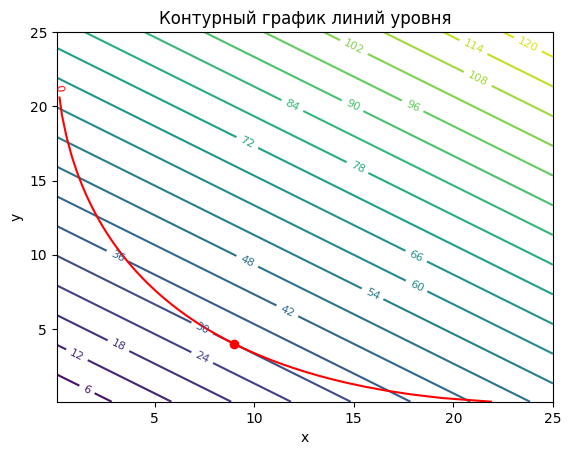

'\n# Г) Объяснение\n\nМетод множителей Лагранжа не может найти максимум в данной задаче, \nпотому что он работает только в том случае, если ограничение и функция \nдифференцируемы в точке экстремума. В данном случае, ограничение √x + √y = 5 \nне дифференцируемо в точке (25, 0), так как частная производная по y \nстремится к бесконечности при приближении к этой точке.\n\nНа графике видно, что линии уровня функции f(x, y) = 2x + 3y \nкасаются линии ограничения √x + √y = 5 в точке (9, 4). \nЭто точка условного максимума. \n\nТочка (25, 0) не является точкой экстремума, \nхотя значение функции в ней больше, чем в точке (9, 4). \nЭто связано с тем, что точка (25, 0) лежит на границе допустимой области, \nи мы можем получить сколь угодно большие значения функции, \nприближаясь к этой точке.\n'

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Определение функции
def f(x, y):
    return 2*x + 3*y

# Определение ограничения
def g(args):
    x, y, l = args
    # Векторизация условия с помощью np.where
    return np.where((x >= 0) & (y >= 0), np.sqrt(x) + np.sqrt(y) - 5, 10**9)

# Создание сетки значений x и y
x = np.linspace(0.1, 25, 100)
y = np.linspace(0.1, 25, 100)
X, Y = np.meshgrid(x, y)

# Вычисление значений функции и ограничения
Z = f(X, Y)
C = g([X, Y, 0])  # l не используется в g, но нужно передать аргумент

# Построение контурного графика линий уровня функции и ограничения
fig, ax = plt.subplots()
contour_f = ax.contour(X, Y, Z, levels=20)
contour_g = ax.contour(X, Y, C, levels=[0], colors='red')
ax.clabel(contour_f, inline=True, fontsize=8)
ax.clabel(contour_g, inline=True, fontsize=8)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Контурный график линий уровня')

# А) Метод множителей Лагранжа

# Определение функции Лагранжа
def L(args):
    x, y, l = args
    return f(x, y) + l * g(args)

# Вычисление частных производных функции Лагранжа
def grad_L(args):
    x, y, l = args
    # Избегаем деления на 0, возвращая большое число
    dL_dx = np.where(x > 0, 2 + l / (2 * np.sqrt(x)), 10**9)
    dL_dy = np.where(y > 0, 3 + l / (2 * np.sqrt(y)), 10**9)
    dL_dl = g(args)
    return [dL_dx, dL_dy, dL_dl]

# Решение системы уравнений на стационарные точки
# с помощью метода Ньютона
x0 = [1, 1, 1]  # Начальное приближение
sol = fsolve(grad_L, x0)
x_extr, y_extr, l_extr = sol

# Вывод результатов
print(f"Стационарная точка: ({x_extr:.4f}, {y_extr:.4f})")
print(f"Значение функции в стационарной точке: {f(x_extr, y_extr):.4f}")

# Б) Вычисление f(25, 0)
result_b = f(25, 0)
print(f"f(25, 0) = {result_b:.4f}")

# Г) Объяснение
print(f"f(9, 4) = {f(9, 4):.4f}")
plt.plot(9, 4, 'ro')

plt.show()

"""
# Г) Объяснение

Метод множителей Лагранжа не может найти максимум в данной задаче, 
потому что он работает только в том случае, если ограничение и функция 
дифференцируемы в точке экстремума. В данном случае, ограничение √x + √y = 5 
не дифференцируемо в точке (25, 0), так как частная производная по y 
стремится к бесконечности при приближении к этой точке.

На графике видно, что линии уровня функции f(x, y) = 2x + 3y 
касаются линии ограничения √x + √y = 5 в точке (9, 4). 
Это точка условного максимума.  


Точка (25, 0) не является точкой экстремума, 
хотя значение функции в ней больше, чем в точке (9, 4). 
Это связано с тем, что точка (25, 0) лежит на границе допустимой области, 
и мы можем получить сколь угодно большие значения функции, 
приближаясь к этой точке.
"""